In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
features = pd.read_csv("/content/drive/MyDrive/PCD/Colab Notebooks/features.csv")

In [ ]:
student_assessment = pd.read_csv("/content/drive/MyDrive/PCD/Colab Notebooks/features.csv")

In [6]:
features.drop("Unnamed: 0", axis=1, inplace=True)

In [7]:
features.head(10)

,id_student,clickrate_active,clickrate_reflective,clickrate_global,clickrate_sensing,clickrate_verbal,clickrate_visual,clickrate_sequential,highest_education,age_band,education,age
0,6516,0.060606,0.055556,0.444444,1.000000,0.300000,0.142857,1.0,HE Qualification,55<=,0.00,0.25
1,8462,0.200000,0.250000,0.354839,0.375000,0.625000,1.000000,1.0,HE Qualification,55<=,0.00,0.25
2,8462,0.200000,0.250000,0.354839,0.375000,0.625000,1.000000,1.0,HE Qualification,55<=,0.00,0.25
3,11391,0.240000,0.028169,0.227273,1.000000,0.800000,1.000000,1.0,HE Qualification,55<=,0.00,0.25
4,23629,0.100000,0.437500,0.400000,1.000000,1.000000,1.000000,1.0,Lower Than A Level,0-35,0.25,0.50
5,23698,0.500000,0.109375,0.600000,1.000000,1.000000,1.000000,1.0,A Level or Equivalent,0-35,0.50,0.50
6,23798,0.428571,0.407186,0.666667,1.000000,0.500000,1.000000,1.0,A Level or Equivalent,0-35,0.50,0.50
7,24186,0.285714,0.420168,1.000000,1.000000,1.000000,1.000000,1.0,Lower Than A Level,0-35,0.25,0.50
8,24213,0.076923,0.160000,0.517857,0.235294,0.913043,1.000000,1.0,A Level or Equivalent,0-35,0.50,0.50
9,24213,0.076923,0.160000,0.517857,0.235294,0.913043,1.000000,1.0,A Level or Equivalent,0-35,0.50,0.50


#Elbow Function

##All features

In [8]:
sse = []
k_rng = range(1,20)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(features[["clickrate_active","clickrate_reflective",	"clickrate_global",	"clickrate_sensing",	"clickrate_verbal",	"clickrate_visual",	"clickrate_sequential","education","age"]])
    sse.append(km.inertia_)

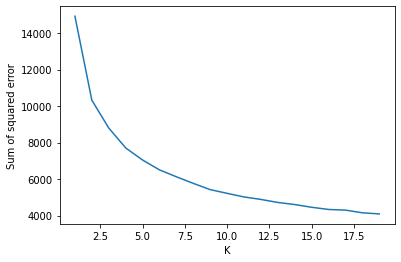

In [9]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [10]:
km = KMeans(n_clusters=12)

In [11]:
y_predicted = km.fit_predict(features[["clickrate_active","clickrate_reflective",	"clickrate_global",	"clickrate_sensing",	"clickrate_verbal",	"clickrate_visual",	"clickrate_sequential","education","age"]])

In [12]:
features['cluster']=y_predicted

In [13]:
features[features["cluster"]==0].describe(include= 'all')

,id_student,clickrate_active,clickrate_reflective,clickrate_global,clickrate_sensing,clickrate_verbal,clickrate_visual,clickrate_sequential,highest_education,age_band,education,age,cluster
count,3.628000e+03,3628.000000,3628.000000,3628.000000,3628.000000,3628.000000,3628.000000,3628.000000,3628,3628,3628.000000,3628.000000,3628.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A Level or Equivalent,0-35,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1573,2395,NaN,NaN,NaN
mean,6.986721e+05,0.256093,0.326081,0.422328,0.982934,0.453556,0.995835,0.986171,NaN,NaN,0.333655,0.582483,0.0
std,5.509476e+05,0.147511,0.197458,0.160875,0.070663,0.132876,0.033273,0.093479,NaN,NaN,0.181977,0.120173,0.0
min,2.379800e+04,0.008157,0.004902,0.050000,0.500000,0.040564,0.500000,0.142857,NaN,NaN,0.000000,0.250000,0.0
25%,4.977648e+05,0.142857,0.140324,0.314146,1.000000,0.333333,1.000000,1.000000,NaN,NaN,0.250000,0.500000,0.0
50%,5.723765e+05,0.230769,0.333333,0.413967,1.000000,0.500000,1.000000,1.000000,NaN,NaN,0.250000,0.500000,0.0
75%,6.292912e+05,0.333333,0.470588,0.500000,1.000000,0.500000,1.000000,1.000000,NaN,NaN,0.500000,0.750000,0.0


##Clickrate_active feature

In [14]:
sse1 = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(features[["clickrate_active"]])
    sse1.append(km.inertia_)

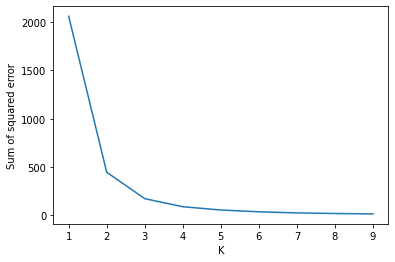

In [15]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse1)

In [16]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(features[["clickrate_active"]])
features['cluster']=y_predicted

In [17]:
features[features["cluster"]==1]

,id_student,clickrate_active,clickrate_reflective,clickrate_global,clickrate_sensing,clickrate_verbal,clickrate_visual,clickrate_sequential,highest_education,age_band,education,age,cluster
18,25997,1.0,0.500000,1.000000,1.0,1.0,1.0,1.0,A Level or Equivalent,0-35,0.50,0.50,1
39,28418,1.0,0.304348,0.492537,1.0,1.0,1.0,1.0,A Level or Equivalent,0-35,0.50,0.50,1
57,30096,1.0,0.084507,0.454545,1.0,1.0,1.0,1.0,HE Qualification,0-35,0.00,0.50,1
78,32930,1.0,0.318750,0.400000,1.0,1.0,1.0,1.0,A Level or Equivalent,35-55,0.50,0.75,1
104,35001,1.0,0.437500,0.500000,1.0,1.0,1.0,1.0,Lower Than A Level,35-55,0.25,0.75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29408,2683697,1.0,0.733333,0.333333,1.0,1.0,1.0,1.0,Lower Than A Level,0-35,0.25,0.50,1
29429,2686365,1.0,1.000000,0.333333,0.5,0.5,1.0,1.0,A Level or Equivalent,0-35,0.50,0.50,1
29444,2687739,1.0,0.500000,1.000000,1.0,1.0,1.0,1.0,A Level or Equivalent,35-55,0.50,0.75,1
29447,2688067,1.0,0.185185,0.571429,0.5,1.0,1.0,1.0,A Level or Equivalent,0-35,0.50,0.50,1


In [18]:
features[features["cluster"]==1].describe(include= 'all')

,id_student,clickrate_active,clickrate_reflective,clickrate_global,clickrate_sensing,clickrate_verbal,clickrate_visual,clickrate_sequential,highest_education,age_band,education,age,cluster
count,3.471000e+03,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,3471,3471,3471.000000,3471.000000,3471.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lower Than A Level,0-35,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1642,2612,NaN,NaN,NaN
mean,6.733807e+05,0.980876,0.403909,0.635163,0.935824,0.911623,0.983747,0.993903,NaN,NaN,0.342192,0.559997,1.0
std,4.712213e+05,0.064757,0.309469,0.288523,0.200375,0.194247,0.095251,0.061477,NaN,NaN,0.190648,0.108955,0.0
min,2.599700e+04,0.700000,0.007463,0.058824,0.038462,0.083333,0.125000,0.100000,NaN,NaN,0.000000,0.250000,1.0
25%,5.205070e+05,1.000000,0.165426,0.400000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,0.250000,0.500000,1.0
50%,6.009470e+05,1.000000,0.306050,0.571429,1.000000,1.000000,1.000000,1.000000,NaN,NaN,0.250000,0.500000,1.0
75%,6.505440e+05,1.000000,0.508783,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,0.500000,0.500000,1.0


In [19]:
features[features["cluster"]==0]

,id_student,clickrate_active,clickrate_reflective,clickrate_global,clickrate_sensing,clickrate_verbal,clickrate_visual,clickrate_sequential,highest_education,age_band,education,age,cluster
5,23698,0.500000,0.109375,0.600000,1.000000,1.000000,1.0,1.0,A Level or Equivalent,0-35,0.50,0.5,0
6,23798,0.428571,0.407186,0.666667,1.000000,0.500000,1.0,1.0,A Level or Equivalent,0-35,0.50,0.5,0
13,25150,0.433333,0.111111,0.571429,0.205128,0.888889,1.0,1.0,HE Qualification,0-35,0.00,0.5,0
15,25572,0.500000,0.500000,0.333333,1.000000,0.166667,1.0,1.0,HE Qualification,0-35,0.00,0.5,0
16,25629,0.500000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,Lower Than A Level,0-35,0.25,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29498,2697181,0.543175,0.135294,0.822222,1.000000,0.909091,0.5,1.0,HE Qualification,0-35,0.00,0.5,0
29499,2697608,0.500000,0.285714,0.200000,1.000000,1.000000,1.0,1.0,No Formal quals,0-35,1.00,0.5,0
29500,2697630,0.357143,0.172676,0.432432,1.000000,0.666667,1.0,1.0,HE Qualification,0-35,0.00,0.5,0
29501,2697773,0.523810,0.500000,0.625000,0.500000,0.900000,0.2,1.0,A Level or Equivalent,0-35,0.50,0.5,0


In [20]:
features[features["cluster"]==0].describe(include= 'all')

,id_student,clickrate_active,clickrate_reflective,clickrate_global,clickrate_sensing,clickrate_verbal,clickrate_visual,clickrate_sequential,highest_education,age_band,education,age,cluster
count,9.318000e+03,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318,9318,9318.000000,9318.000000,9318.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A Level or Equivalent,0-35,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4231,7018,NaN,NaN,NaN
mean,6.986843e+05,0.405296,0.243270,0.487254,0.634532,0.743592,0.890416,0.942029,NaN,NaN,0.338807,0.559508,0.0
std,5.490094e+05,0.093489,0.195129,0.202767,0.375026,0.234306,0.226016,0.182485,NaN,NaN,0.192920,0.109028,0.0
min,2.369800e+04,0.292308,0.009639,0.026929,0.015625,0.040564,0.062500,0.055556,NaN,NaN,0.000000,0.250000,0.0
25%,5.001122e+05,0.333333,0.106010,0.333333,0.250000,0.500000,1.000000,1.000000,NaN,NaN,0.250000,0.500000,0.0
50%,5.885500e+05,0.377049,0.171875,0.500000,0.666667,0.750000,1.000000,1.000000,NaN,NaN,0.250000,0.500000,0.0
75%,6.429015e+05,0.470588,0.333333,0.600000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,0.500000,0.500000,0.0


In [21]:
features[features["cluster"]==2].describe(include= 'all')

,id_student,clickrate_active,clickrate_reflective,clickrate_global,clickrate_sensing,clickrate_verbal,clickrate_visual,clickrate_sequential,highest_education,age_band,education,age,cluster
count,1.672400e+04,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000,16724,16724,16724.000000,16724.000000,16724.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A Level or Equivalent,0-35,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7282,11049,NaN,NaN,NaN
mean,7.198004e+05,0.180590,0.224974,0.425377,0.566090,0.695312,0.864448,0.923066,NaN,NaN,0.331081,0.580229,2.0
std,5.678819e+05,0.067393,0.176037,0.185858,0.378858,0.244380,0.248133,0.208595,NaN,NaN,0.195312,0.121542,0.0
min,6.516000e+03,0.005848,0.004902,0.011173,0.013514,0.008230,0.047619,0.043478,NaN,NaN,0.000000,0.250000,2.0
25%,5.085320e+05,0.128205,0.100000,0.300000,0.200000,0.500000,0.833333,1.000000,NaN,NaN,0.250000,0.500000,2.0
50%,5.876935e+05,0.186707,0.163291,0.400000,0.500000,0.666667,1.000000,1.000000,NaN,NaN,0.250000,0.500000,2.0
75%,6.374692e+05,0.240310,0.318182,0.500000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,0.500000,0.750000,2.0


##Learning style and age 

In [22]:
sse11 = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(features[["cluster","age"]])
    sse11.append(km.inertia_)

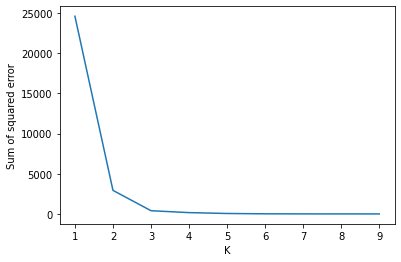

In [23]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse11)

In [24]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(features[["cluster","age"]])
features['cluster_age']=y_predicted

In [25]:
features[features["cluster_age"]==0].describe(include= 'all')

,id_student,clickrate_active,clickrate_reflective,clickrate_global,clickrate_sensing,clickrate_verbal,clickrate_visual,clickrate_sequential,highest_education,age_band,education,age,cluster,cluster_age
count,3.471000e+03,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,3471,3471,3471.000000,3471.000000,3471.0,3471.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,3,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lower Than A Level,0-35,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1642,2612,NaN,NaN,NaN,NaN
mean,6.733807e+05,0.980876,0.403909,0.635163,0.935824,0.911623,0.983747,0.993903,NaN,NaN,0.342192,0.559997,1.0,0.0
std,4.712213e+05,0.064757,0.309469,0.288523,0.200375,0.194247,0.095251,0.061477,NaN,NaN,0.190648,0.108955,0.0,0.0
min,2.599700e+04,0.700000,0.007463,0.058824,0.038462,0.083333,0.125000,0.100000,NaN,NaN,0.000000,0.250000,1.0,0.0
25%,5.205070e+05,1.000000,0.165426,0.400000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,0.250000,0.500000,1.0,0.0
50%,6.009470e+05,1.000000,0.306050,0.571429,1.000000,1.000000,1.000000,1.000000,NaN,NaN,0.250000,0.500000,1.0,0.0
75%,6.505440e+05,1.000000,0.508783,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,0.500000,0.500000,1.0,0.0


In [26]:
features[features["cluster_age"]==1].describe(include= 'all')

,id_student,clickrate_active,clickrate_reflective,clickrate_global,clickrate_sensing,clickrate_verbal,clickrate_visual,clickrate_sequential,highest_education,age_band,education,age,cluster,cluster_age
count,1.672400e+04,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000,16724,16724,16724.000000,16724.000000,16724.0,16724.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,3,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A Level or Equivalent,0-35,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7282,11049,NaN,NaN,NaN,NaN
mean,7.198004e+05,0.180590,0.224974,0.425377,0.566090,0.695312,0.864448,0.923066,NaN,NaN,0.331081,0.580229,2.0,1.0
std,5.678819e+05,0.067393,0.176037,0.185858,0.378858,0.244380,0.248133,0.208595,NaN,NaN,0.195312,0.121542,0.0,0.0
min,6.516000e+03,0.005848,0.004902,0.011173,0.013514,0.008230,0.047619,0.043478,NaN,NaN,0.000000,0.250000,2.0,1.0
25%,5.085320e+05,0.128205,0.100000,0.300000,0.200000,0.500000,0.833333,1.000000,NaN,NaN,0.250000,0.500000,2.0,1.0
50%,5.876935e+05,0.186707,0.163291,0.400000,0.500000,0.666667,1.000000,1.000000,NaN,NaN,0.250000,0.500000,2.0,1.0
75%,6.374692e+05,0.240310,0.318182,0.500000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,0.500000,0.750000,2.0,1.0


##Most active : age and education features

In [27]:
sse11 = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    best_active=features[features["cluster"]==2]
    km.fit(best_active[["education","age"]])
    sse11.append(km.inertia_)

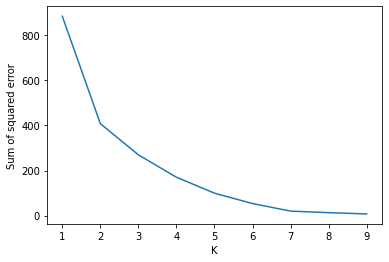

In [28]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse11)

In [29]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(best_active[["education","age"]])
best_active['cluster1']=y_predicted

<ipython-input-29-8e80e1a20a9d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_active['cluster1']=y_predicted


In [30]:
best_active[best_active["cluster1"]==0].describe(include= 'all')

,id_student,clickrate_active,clickrate_reflective,clickrate_global,clickrate_sensing,clickrate_verbal,clickrate_visual,clickrate_sequential,highest_education,age_band,education,age,cluster,cluster_age,cluster1
count,5.796000e+03,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796,5796,5796.000000,5796.000000,5796.0,5796.0,5796.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lower Than A Level,0-35,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4309,5676,NaN,NaN,NaN,NaN,NaN
mean,6.534409e+05,0.184604,0.227603,0.435722,0.575992,0.711746,0.872904,0.924383,NaN,NaN,0.185861,0.494824,2.0,1.0,0.0
std,4.888973e+05,0.066560,0.181603,0.191004,0.378648,0.241671,0.241336,0.206146,NaN,NaN,0.109193,0.035601,0.0,0.0,0.0
min,6.516000e+03,0.009901,0.007812,0.031250,0.016949,0.035714,0.047619,0.043478,NaN,NaN,0.000000,0.250000,2.0,1.0,0.0
25%,5.082440e+05,0.133333,0.099059,0.312500,0.208333,0.500000,1.000000,1.000000,NaN,NaN,0.000000,0.500000,2.0,1.0,0.0
50%,5.834775e+05,0.192308,0.166478,0.411765,0.500000,0.707825,1.000000,1.000000,NaN,NaN,0.250000,0.500000,2.0,1.0,0.0
75%,6.305605e+05,0.248062,0.320000,0.500000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,0.250000,0.500000,2.0,1.0,0.0


In [31]:
best_active[best_active["cluster1"]==1].describe(include= 'all')

,id_student,clickrate_active,clickrate_reflective,clickrate_global,clickrate_sensing,clickrate_verbal,clickrate_visual,clickrate_sequential,highest_education,age_band,education,age,cluster,cluster_age,cluster1
count,7.619000e+03,7619.000000,7619.000000,7619.000000,7619.000000,7619.000000,7619.000000,7619.000000,7619,7619,7619.000000,7619.000000,7619.0,7619.0,7619.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A Level or Equivalent,0-35,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7282,5373,NaN,NaN,NaN,NaN,NaN
mean,7.029531e+05,0.181656,0.221234,0.428765,0.562715,0.690709,0.863254,0.926609,NaN,NaN,0.515455,0.571466,2.0,1.0,1.0
std,5.442628e+05,0.067169,0.173017,0.185156,0.378436,0.243538,0.247664,0.203910,NaN,NaN,0.076316,0.115407,0.0,0.0,0.0
min,2.421300e+04,0.005848,0.005982,0.011173,0.014085,0.008230,0.055556,0.045455,NaN,NaN,0.500000,0.250000,2.0,1.0,1.0
25%,5.058150e+05,0.130435,0.100000,0.303571,0.201670,0.500000,0.800000,1.000000,NaN,NaN,0.500000,0.500000,2.0,1.0,1.0
50%,5.864940e+05,0.188172,0.157895,0.400000,0.444444,0.666667,1.000000,1.000000,NaN,NaN,0.500000,0.500000,2.0,1.0,1.0
75%,6.339580e+05,0.241379,0.311413,0.500000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,0.500000,0.750000,2.0,1.0,1.0


In [32]:
best_active[best_active["cluster1"]==2].describe(include= 'all')

,id_student,clickrate_active,clickrate_reflective,clickrate_global,clickrate_sensing,clickrate_verbal,clickrate_visual,clickrate_sequential,highest_education,age_band,education,age,cluster,cluster_age,cluster1
count,3.309000e+03,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309,3309,3309.000000,3309.00,3309.0,3309.0,3309.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lower Than A Level,35-55,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2130,3309,NaN,NaN,NaN,NaN,NaN
mean,8.748259e+05,0.171105,0.228981,0.399456,0.556516,0.677125,0.852386,0.912602,NaN,NaN,0.160925,0.75,2.0,1.0,2.0
std,7.049756e+05,0.068474,0.172879,0.175728,0.379930,0.249312,0.260186,0.222769,NaN,NaN,0.119745,0.00,0.0,0.0,0.0
min,2.602300e+04,0.008157,0.004902,0.028571,0.013514,0.071429,0.047619,0.043478,NaN,NaN,0.000000,0.75,2.0,1.0,2.0
25%,5.153490e+05,0.119048,0.102941,0.266667,0.200000,0.500000,0.730769,1.000000,NaN,NaN,0.000000,0.75,2.0,1.0,2.0
50%,6.003200e+05,0.168033,0.169231,0.380952,0.428571,0.666667,1.000000,1.000000,NaN,NaN,0.250000,0.75,2.0,1.0,2.0
75%,6.922970e+05,0.228188,0.333333,0.500000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,0.250000,0.75,2.0,1.0,2.0
